# Analyse exploratoire du dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Chargement des données
data_path = 'data/btc_data_hourly.csv'
data = pd.read_csv(data_path)

In [3]:
# Aperçu des données
print("\n=== Aperçu des premières lignes ===")
print(data.head())

print("\n=== Informations sur les données ===")
print(data.info())


=== Aperçu des premières lignes ===
   Unnamed: 0            Timestamp     Open     High      Low    Close  \
0           0  2017-08-17 04:00:00  4261.48  4313.62  4261.32  4308.83   
1           1  2017-08-17 05:00:00  4308.83  4328.69  4291.37  4315.32   
2           2  2017-08-17 06:00:00  4330.29  4345.45  4309.37  4324.35   
3           3  2017-08-17 07:00:00  4316.62  4349.99  4287.41  4349.99   
4           4  2017-08-17 08:00:00  4333.32  4377.85  4333.32  4360.69   

      Volume     Close_Time  Quote_Asset_Volume  Number_of_Trades  \
0  47.181009  1502945999999       202366.138393               171   
1  23.234916  1502949599999       100304.823567               102   
2   7.229691  1502953199999        31282.312670                36   
3   4.443249  1502956799999        19241.058300                25   
4   0.972807  1502960399999         4239.503586                28   

   Taker_Buy_Base_Volume  Taker_Buy_Quote_Volume  Ignore  
0              35.160503           150952.47

In [4]:
# Conversion du champ Timestamp en datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Configuration de l'index temporel
data.set_index('Timestamp', inplace=True)

# Résumé statistique
data_summary = data.describe()
print("\n=== Résumé statistique ===")
print(data_summary)


=== Résumé statistique ===
         Unnamed: 0           Open           High            Low  \
count  64375.000000   64375.000000   64375.000000   64375.000000   
mean   32187.000000   26874.792774   27000.613229   26741.980541   
std    18583.606127   21826.590833   21917.303086   21731.609769   
min        0.000000    2870.900000    2950.000000    2817.000000   
25%    16093.500000    8513.850000    8563.585000    8462.000000   
50%    32187.000000   20120.970000   20219.830000   20030.000000   
75%    48280.500000   41891.000000   42062.915000   41713.495000   
max    64374.000000  108258.380000  108353.000000  107130.000000   

               Close         Volume    Close_Time  Quote_Asset_Volume  \
count   64375.000000   64375.000000  6.437500e+04        6.437500e+04   
mean    26876.256642    2848.244694  1.619181e+12        7.181895e+07   
std     21828.261319    4110.952719  6.701467e+10        1.042465e+08   
min      2919.000000       0.000000  1.502946e+12        0.000000e+

## Tendance temporelle : Evolution du prix de clôture (Close) sur toute la période.

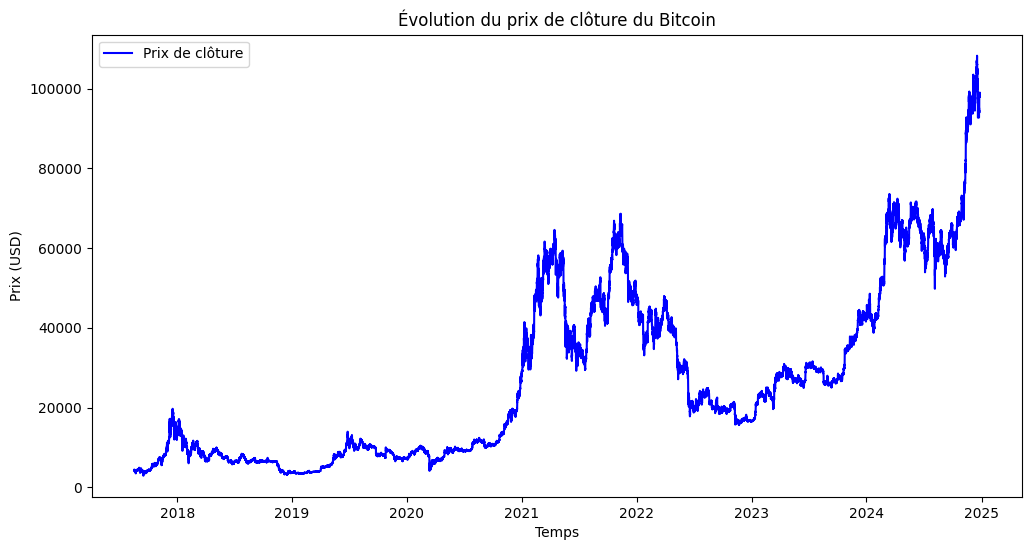

In [5]:
# Visualisation de l'évolution des prix de clôture
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Prix de clôture', color='blue')
plt.title("Évolution du prix de clôture du Bitcoin")
plt.xlabel("Temps")
plt.ylabel("Prix (USD)")
plt.legend()
plt.show()

L'évolution du prix de clôture du Bitcoin est bien représentée sur l'axe des ordonnées (USD) en fonction du temps (axe des abscisses). Cela permet de visualiser les tendances sur toute la période analysée.
On peut clairement observer les pics (comme en 2021) et les creux, ce qui est essentiel pour une série temporelle. Les variations régulières et les périodes de stabilité sont facilement identifiables.

## Volumes d’échange : Histogramme ou séries temporelles des volumes (Volume).

Ce graphique représente un histogramme des volumes échangés, c'est-à-dire la répartition des montants échangés (en termes de volume) pour chaque heure enregistrée dans le dataset.

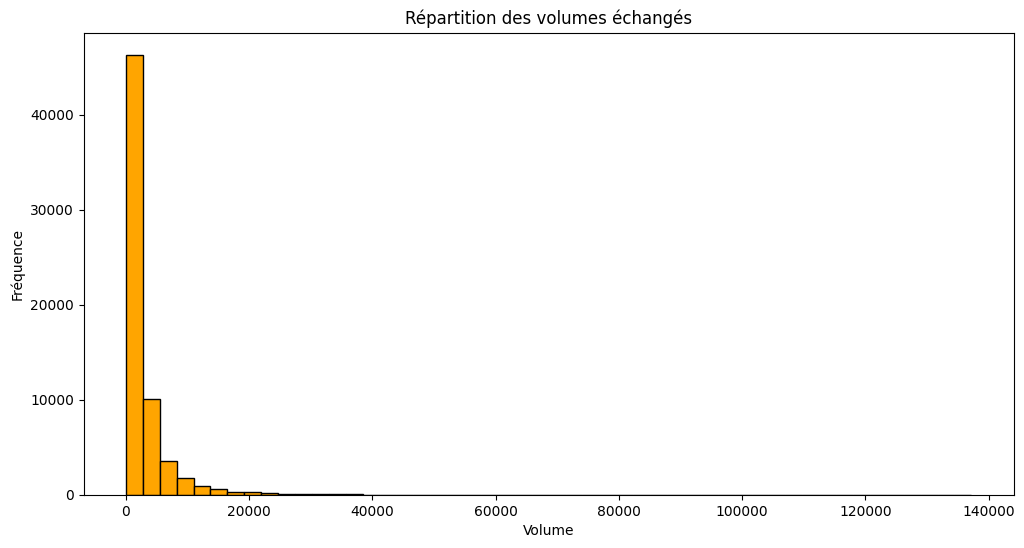

In [6]:
# Histogramme des volumes échangés
plt.figure(figsize=(12, 6))
plt.hist(data['Volume'], bins=50, color='orange', edgecolor='black')
plt.title("Répartition des volumes échangés")
plt.xlabel("Volume")
plt.ylabel("Fréquence")
plt.show()

La majorité des volumes échangés sont faibles, ce qui explique le pic massif dans la première barre à gauche. Cela signifie que, dans la plupart des cas, les échanges ont eu lieu avec des volumes relativement bas. Ce type de distribution est commun en finance, où quelques événements extrêmes peuvent représenter une grande partie des échanges.

## Moyennes par jour, heure ou semaine pour détecter des motifs répétitifs.

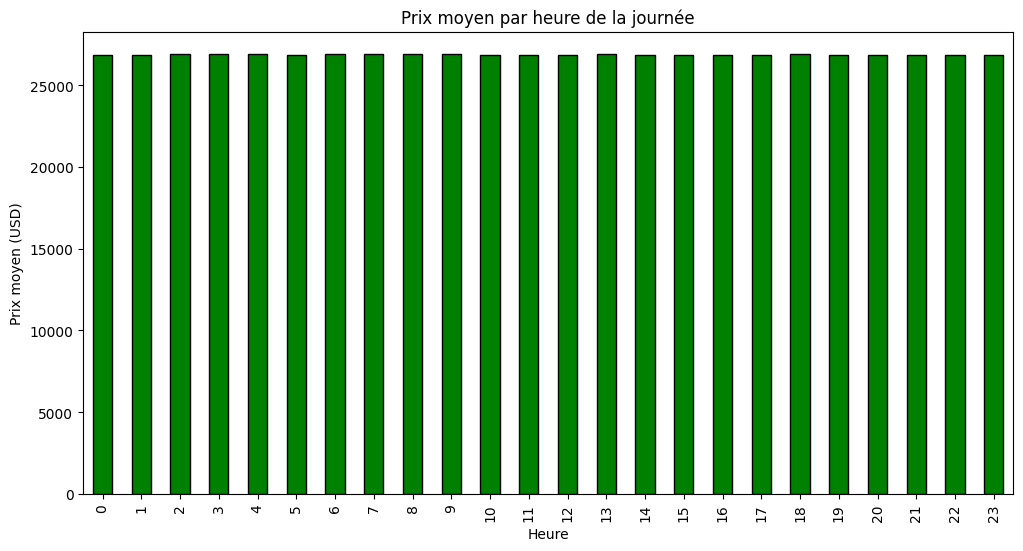

In [7]:
# Saisonnalité : Moyennes par heure
data['Hour'] = data.index.hour
hourly_avg = data.groupby('Hour')['Close'].mean()

plt.figure(figsize=(12, 6))
hourly_avg.plot(kind='bar', color='green', edgecolor='black')
plt.title("Prix moyen par heure de la journée")
plt.xlabel("Heure")
plt.ylabel("Prix moyen (USD)")
plt.show()

Les barres sont quasiment toutes identiques. Cela indique que le prix moyen du Bitcoin ne varie pas significativement selon l’heure de la journée. Le graphique ne révèle pas de tendance horaire particulière. Cela signifie qu’inclure l’heure dans le modèle comme une variable explicative (feature) aurait peu ou pas d’impact. Le Bitcoin est un actif mondial qui se négocie 24/7. Par conséquent, il est peu probable que des cycles horaires influencent fortement son prix.

## Corrélations entre les colonnes

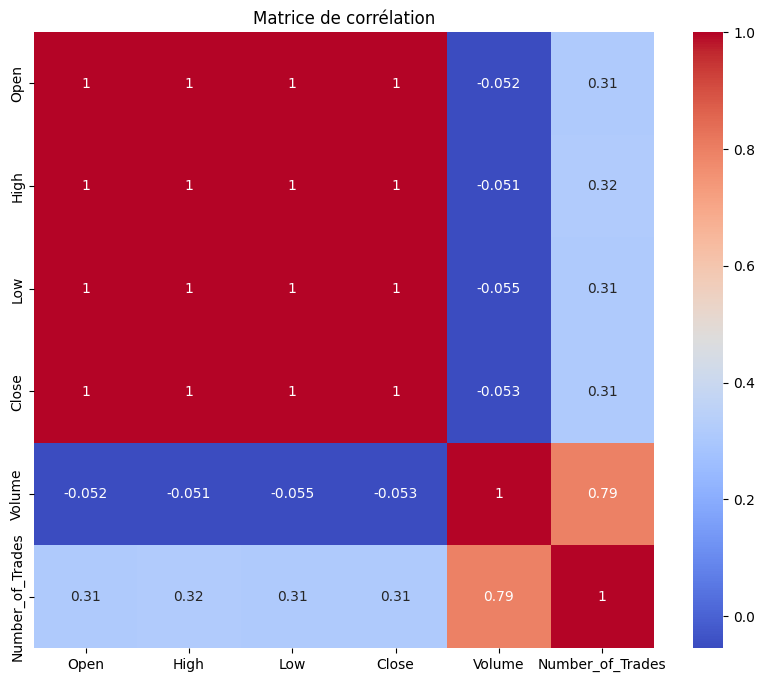

In [8]:
corr_matrix = data[['Open', 'High', 'Low', 'Close', 'Volume', 'Number_of_Trades']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

Les colonnes `Open`, `High`, `Low`, et `Close` sont parfaitement corrélées entre elles (valeur de 1). Cela signifie que ces variables contiennent des informations redondantes.
Le `Volume` et le `Number_of_Trades` ont une forte corrélation entre eux (0.79), ce qui indique qu’ils reflètent des comportements similaires du marché.

## Relation entre Volume et les prix

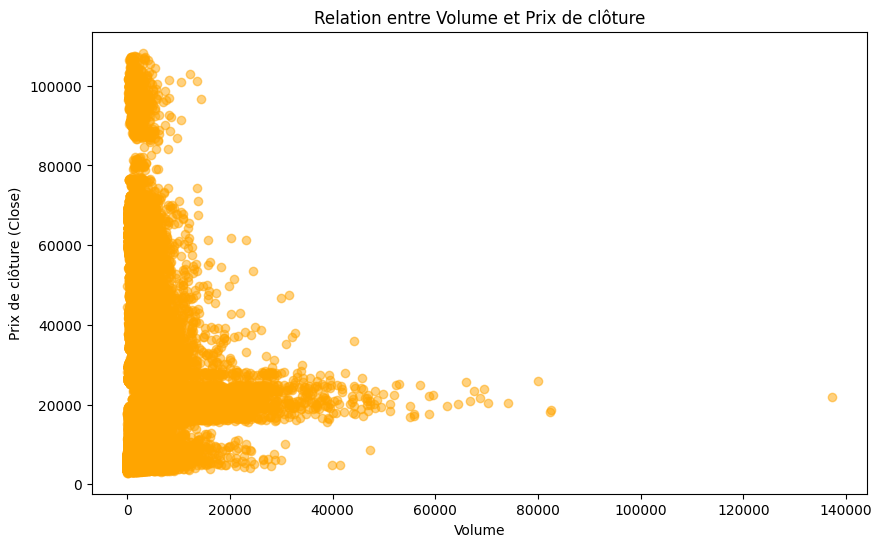

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Volume'], data['Close'], alpha=0.5, color='orange')
plt.title('Relation entre Volume et Prix de clôture')
plt.xlabel('Volume')
plt.ylabel('Prix de clôture (Close)')
plt.show()

On voit une concentration importante des points pour les faibles volumes. Cela signifie que la majorité des transactions se produisent avec de petits volumes. Cependant, il n’y a pas de relation évidente entre le volume et le prix de clôture. Le volume pourrait ne pas être un indicateur clé pour prédire le prix.

## Analyse de la volatilité

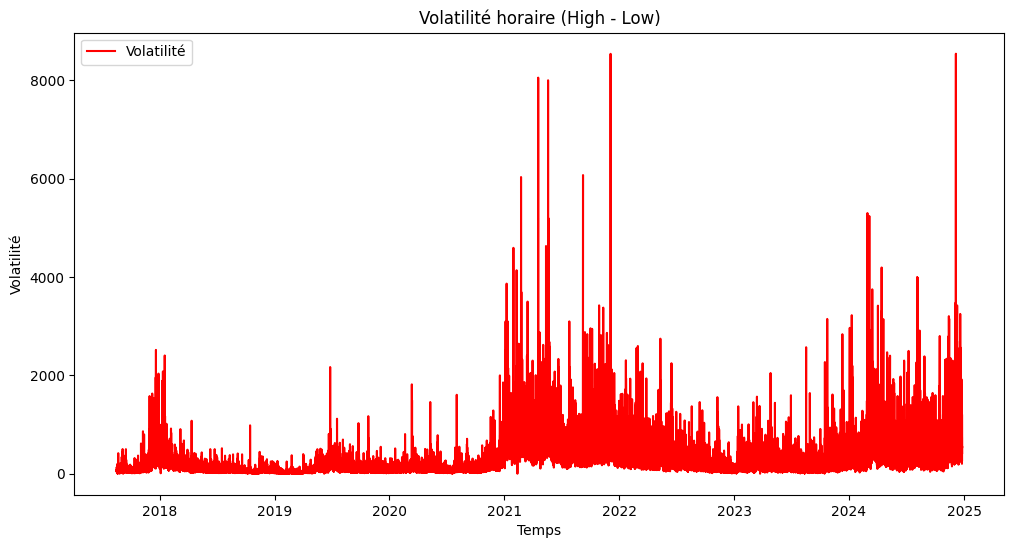

In [10]:
data['Volatility'] = data['High'] - data['Low']
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Volatility'], label='Volatilité', color='red')
plt.title('Volatilité horaire (High - Low)')
plt.xlabel('Temps')
plt.ylabel('Volatilité')
plt.legend()
plt.show()

Les pics de volatilité montrent des moments où les fluctuations du marché sont plus importantes. Cela peut être lié à des événements ou à des comportements spécifiques du marché. Ces données pourraient être intéressantes pour prédire des mouvements brusques.

## Tendances globales du prix Close

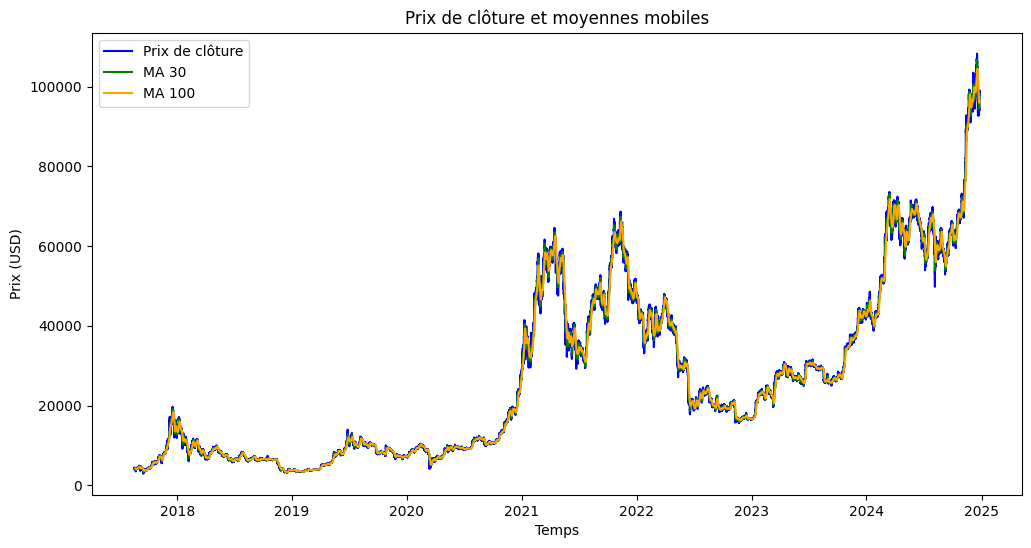

In [11]:
data['Close_MA_30'] = data['Close'].rolling(window=30).mean()
data['Close_MA_100'] = data['Close'].rolling(window=100).mean()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Prix de clôture', color='blue')
plt.plot(data.index, data['Close_MA_30'], label='MA 30', color='green')
plt.plot(data.index, data['Close_MA_100'], label='MA 100', color='orange')
plt.title('Prix de clôture et moyennes mobiles')
plt.xlabel('Temps')
plt.ylabel('Prix (USD)')
plt.legend()
plt.show()

Les moyennes mobiles (MA 30 et MA 100) montrent bien les tendances long terme et aident à lisser les fluctuations à court terme. Cela peut être utile pour identifier les tendances générales.

## Ajout de nouvelles variables pertinentes pour l'amélioration de la performance des modèles

### Volatilité relative

La volatilité brute (`High - Low`) est utile, mais elle peut être influencée par les niveaux de prix. La volatilité relative (normalisée par le prix de clôture) permet de mieux comparer les fluctuations à travers différentes périodes. Si la volatilité relative est élevée (par exemple, > 0.1), cela indique des fluctuations importantes proportionnellement au prix.

In [12]:
data['Relative_Volatility'] = (data['High'] - data['Low']) / data['Close']

### Variation de prix (Change)

La variation d’un prix par rapport à la période précédente capture la dynamique récente. Cela peut indiquer si le marché est en montée, en descente, ou stable. Une variation positive indique une montée du prix, une variation négative indique une baisse.

In [13]:
data['Price_Change'] = data['Close'].diff()

### Retour logarithmique (Log Return)

Les rendements logarithmiques sont souvent utilisés en finance pour analyser les mouvements relatifs des prix. Ils sont moins sensibles aux grandes valeurs extrêmes que les rendements simples. Une valeur positive indique un gain relatif, une valeur négative indique une perte relative.

In [14]:
data['Log_Return'] = np.log(data['Close'] / data['Close'].shift(1))

### Croisement des moyennes mobiles

Les croisements entre deux moyennes mobiles (par exemple, MA30 et MA100) sont des indicateurs courants pour les tendances long terme et court terme. Un croisement positif (`MA_30 > MA_100`) peut indiquer une tendance haussière, et un croisement négatif une tendance baissière.

In [15]:
data['MA_30'] = data['Close'].rolling(window=30).mean()
data['MA_100'] = data['Close'].rolling(window=100).mean()
data['MA_Cross'] = data['MA_30'] - data['MA_100']

### Ratio Volume/Trades

Ce ratio indique la taille moyenne des transactions. Cela peut révéler des périodes où des gros investisseurs (ou des petits) dominent le marché. Une valeur élevée suggère que de grosses transactions ont lieu, ce qui peut influencer les mouvements de prix.

In [16]:
data['Volume_per_Trade'] = data['Volume'] / data['Number_of_Trades']

### Momentum (optionnel mais puissant)

Le momentum est une mesure de la vitesse à laquelle les prix changent. Cela peut indiquer si un mouvement récent va probablement se poursuivre. Si le momentum est positif, cela indique une forte tendance haussière récente.

In [17]:
data['Momentum'] = data['Close'] - data['Close'].shift(10)

## Vérification de la pertinence des nouvelles variables

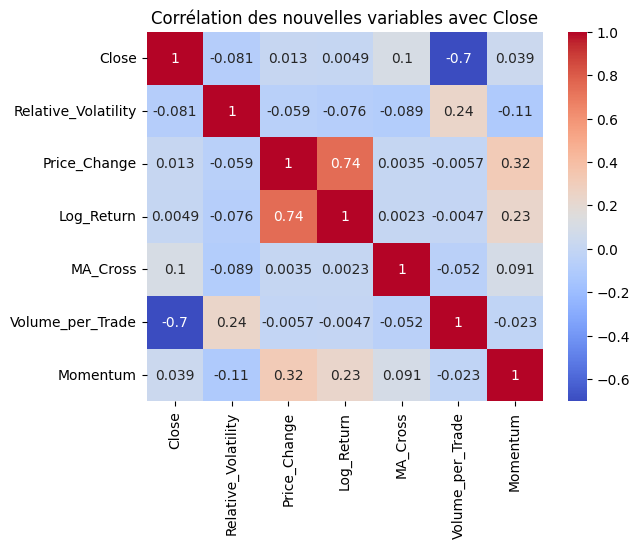

In [18]:
new_corr_matrix = data[['Close', 'Relative_Volatility', 'Price_Change', 'Log_Return', 
                        'MA_Cross', 'Volume_per_Trade', 'Momentum']].corr()
sns.heatmap(new_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Corrélation des nouvelles variables avec Close')
plt.show()

Variables avec une corrélation notable avec `Close` : 
- MA_Cross : Corrélation de 0.1 avec `Close` : Même si la corrélation est modérée, cela peut indiquer une légère relation. Comme cette variable capture les croisements des moyennes mobiles, elle pourrait aider à détecter des tendances.
- Volume_per_Trade : Corrélation de -0.7 avec `Close` : C’est une corrélation significative et négative. Cela pourrait indiquer que lorsque les transactions sont plus grandes, les prix sont plus bas, ce qui est une information intéressante.
- Momentum : Corrélation de 0.039 : C’est une relation faible, mais elle pourrait être explorée dans un modèle pour vérifier son impact combiné avec d’autres variables.

Variables avec une corrélation faible ou négligeable :
- Relative_Volatility : Corrélation de -0.081 : Peu de lien direct avec `Close`. Cette variable semble peu pertinente pour prédire les prix.
- Price_Change : Corrélation de 0.013 : Relation presque inexistante avec `Close`.
- Log_Return : Corrélation de 0.0049 : Très faible corrélation avec `Close`, donc elle pourrait être ignorée si elle n’a pas d’effet indirect.

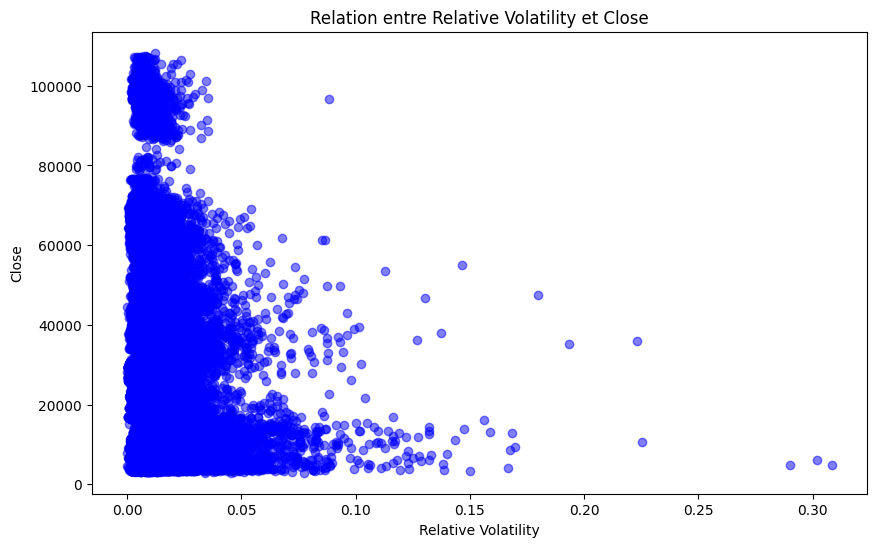

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Relative_Volatility'], data['Close'], alpha=0.5, color='blue')
plt.title('Relation entre Relative Volatility et Close')
plt.xlabel('Relative Volatility')
plt.ylabel('Close')
plt.show()

Ce graphique ne révèle pas de relation forte ou cohérente entre la volatilité relative et le prix de clôture. Cela suggère que cette variable est peu pertinente pour améliorer les prédictions des modèles.

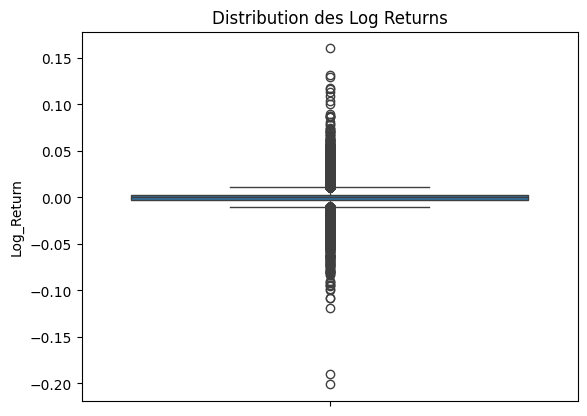

In [20]:
sns.boxplot(data['Log_Return'])
plt.title('Distribution des Log Returns')
plt.show()

Le graphique montre que la distribution des rendements logarithmiques (Log_Return) est fortement concentrée autour de zéro, avec quelques valeurs extrêmes. Cependant, l’analyse de la corrélation avec la variable cible (`Close`) révèle une relation quasi inexistante, ce qui indique que cette variable n’apporte pas d’information significative pour améliorer les prédictions de notre modèle. De plus, la gestion des valeurs extrêmes nécessiterait une préparation supplémentaire sans garantie d’un réel gain de performance. Pour ces raisons, cette variable ne sera pas incluse dans le modèle.

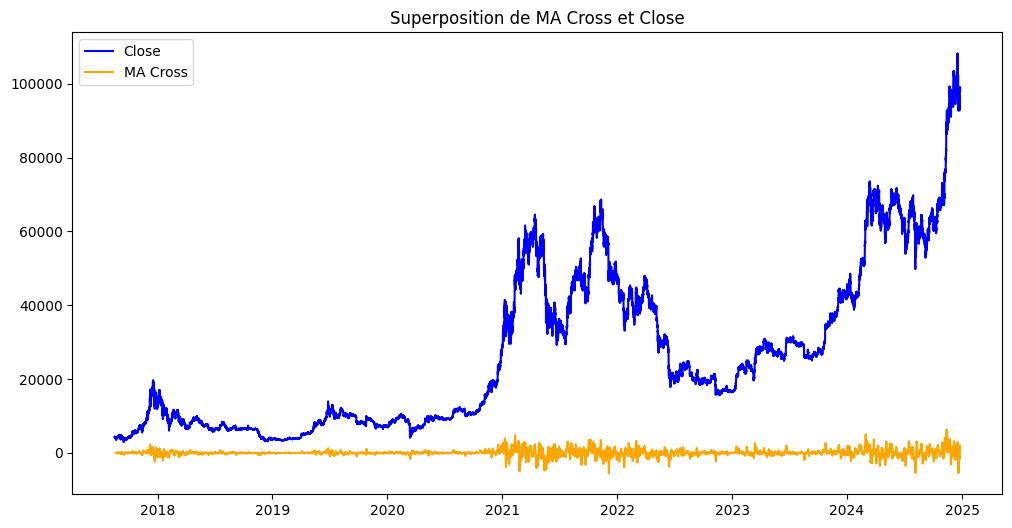

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close', color='blue')
plt.plot(data.index, data['MA_Cross'], label='MA Cross', color='orange')
plt.title('Superposition de MA Cross et Close')
plt.legend()
plt.show()

Le graphique montre la courbe `MA_Cross`, qui reflète les différences entre deux moyennes mobiles (30 et 100 périodes). Bien qu’elle n’ait pas de correspondance directe avec les variations du prix de clôture (`Close`), `MA_Cross` est un indicateur utile pour capturer des tendances globales et des signaux sous-jacents du marché. En tant qu’indicateur de tendance, cette variable peut potentiellement enrichir le modèle en améliorant la capacité à identifier les mouvements haussiers et baissiers. Elle sera donc conservée pour l’entraînement.

## Sauvegarde du dataset

In [22]:
# Étape 1 : S'assurer que 'Timestamp' est dans le bon format
if 'Timestamp' not in data.columns:
    data['Timestamp'] = data.index  # Récupérer le Timestamp depuis l'index
else:
    data['Timestamp'] = pd.to_datetime(data['Timestamp'])  # S'assurer qu'il est en datetime

# Étape 2 : Créer un nouveau DataFrame avec les colonnes pertinentes
columns_to_keep = [
    'Timestamp',  # Référence temporelle
    'Open', 'High', 'Low', 'Close', 'Volume',  # Variables de base pertinentes
    'MA_Cross', 'Volume_per_Trade', 'Momentum'  # Nouvelles variables sélectionnées
]
filtered_data = data[columns_to_keep]

# Étape 3 : Nettoyer les données
# Supprimer les premières lignes avec NaN dues aux moyennes mobiles ou au momentum
filtered_data = filtered_data.dropna(subset=['MA_Cross', 'Momentum'])

# Remplacer les NaN dans Volume_per_Trade par 0
filtered_data['Volume_per_Trade'] = filtered_data['Volume_per_Trade'].fillna(0)

# Étape 4 : Vérifications et statistiques
print("\n=== Vérification des valeurs manquantes ===")
print(filtered_data.isna().sum())

print("\n=== Nombre total de lignes restantes ===")
print(len(filtered_data))

num_zeros = (filtered_data['Volume_per_Trade'] == 0).sum()
print("\n=== Nombre de zéros dans Volume_per_Trade ===")
print(num_zeros)

print("\n=== Statistiques descriptives ===")
print(filtered_data.describe())


=== Vérification des valeurs manquantes ===
Timestamp           0
Open                0
High                0
Low                 0
Close               0
Volume              0
MA_Cross            0
Volume_per_Trade    0
Momentum            0
dtype: int64

=== Nombre total de lignes restantes ===
64276

=== Nombre de zéros dans Volume_per_Trade ===
4

=== Statistiques descriptives ===
                           Timestamp           Open           High  \
count                          64276   64276.000000   64276.000000   
mean   2021-04-25 13:08:25.476383232   26909.747498   27035.715683   
min              2017-08-21 07:00:00    2870.900000    2950.000000   
25%              2019-06-25 07:45:00    8538.072500    8587.632500   
50%              2021-04-26 09:30:00   20165.995000   20259.570000   
75%              2023-02-25 04:15:00   41915.442500   42097.765000   
max              2024-12-25 18:00:00  108258.380000  108353.000000   
std                              NaN   21825.198955 

In [23]:
# Étape 5 : Sauvegarder le DataFrame nettoyé
filtered_data.to_csv('data/btc_data_selected_features_cleaned.csv', index=False)
print("Dataset nettoyé sauvegardé avec succès sous le nom 'btc_data_selected_features_cleaned.csv'")

Dataset nettoyé sauvegardé avec succès sous le nom 'btc_data_selected_features_cleaned.csv'
